Exercise 0.0

In [47]:
# a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

#import libraries
import pandas as pd
import matplotlib.pyplot as plt


# load the dataset
df = pd.read_csv("norway_new_car_sales_by_month.csv")

#look at first rows
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [48]:
# a)

df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [ ]:
# a)

df.shape

In [ ]:
# a)

df.info()

In [ ]:
# a)

df.describe()

In [ ]:
# b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

# Group by year and sum quantity
yearly_quantity = df.groupby("Year")["Quantity"].sum()

# Plot
plt.figure()
yearly_quantity.plot()
plt.title("Total Car Quantity per Year")
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.show()

yearly_quantity

# Ans ques) yes , early yrs may be skipped if low values or incomplete data compared to later yrs

In [ ]:
# c) Draw a line chart of average CO2 emissions for same years that as in b)

# Group by year and take mean
yearly_co2 = df.groupby("Year")["Avg_CO2"].mean()

# Plot
plt.figure()
yearly_co2.plot()
plt.title("Average CO2 Emissions per Year")
plt.xlabel("Year")
plt.ylabel("Average CO2")
plt.show()

yearly_co2

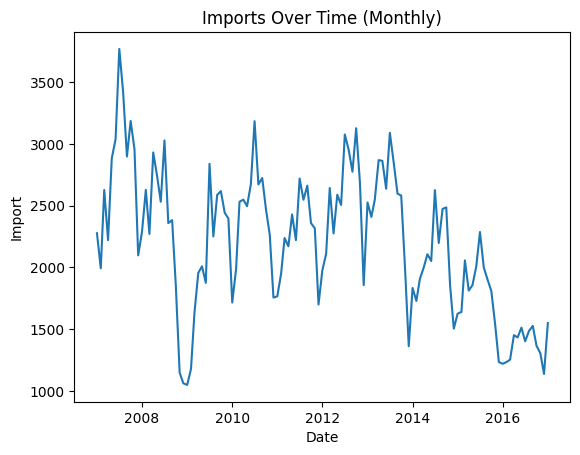

In [ ]:
# d) Draw a line chart of all years and months for import

#df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))

# Create a time column
df["Date"] = pd.to_datetime(
    dict(
        year=df["Year"],
        month=df["Month"],
        day=1
    )
)

df = df.sort_values("Date").reset_index(drop=True)

#Plot 
plt.figure()
plt.plot(df["Date"], df["Import"])
plt.title("Imports Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Import")
plt.show()



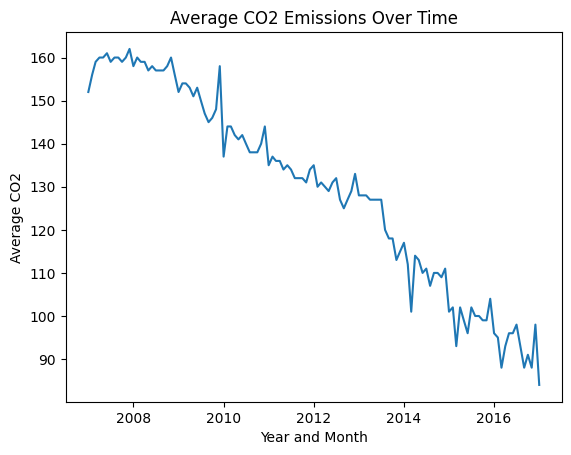

In [46]:
# e) Draw a line chart of all years and months for average CO2 emissions

plt.figure()
plt.plot(df["Date"], df["Avg_CO2"])
plt.title("Average CO2 Emissions Over Time")
plt.xlabel("Year and Month")
plt.ylabel("Average CO2")
plt.show()


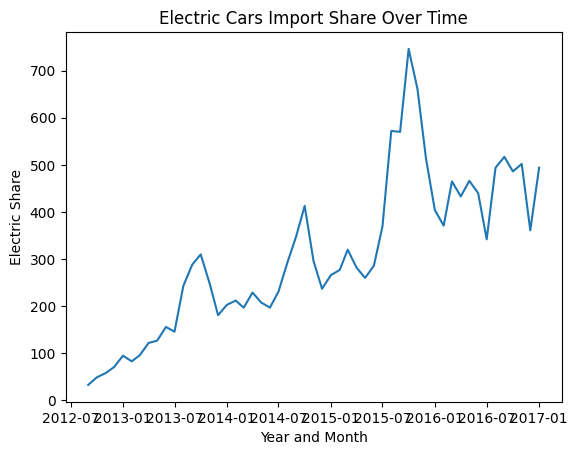

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,Date
68,2012,9,11134,-603,2774,113,35814.0,NaN,125,127,136,6625,59.5,74.6,688.0,583.0,33.0,2012-09-01
69,2012,10,12413,870,3126,768,39922.0,NaN,127,123,138,7150,57.6,77.0,990.0,421.0,49.0,2012-10-01
70,2012,11,11986,-371,2677,361,35300.0,NaN,129,126,138,6784,56.6,76.6,788.0,314.0,58.0,2012-11-01
71,2012,12,9369,-2181,1856,157,24106.0,NaN,133,128,142,6043,64.5,79.8,312.0,232.0,71.0,2012-12-01
72,2013,1,11639,801,2525,550,37079.0,3139.0,128,126,136,6436,55.3,70.0,633.0,337.0,95.0,2013-01-01


In [55]:
# f) Draw a line chart of all years and months for electric cars import where it's relevant.

electric_df = df[df["Import_Electric"] > 0]

plt.figure()
plt.plot(electric_df["Date"], electric_df["Import_Electric"])
plt.title("Electric Cars Import Share Over Time")
plt.xlabel("Year and Month")
plt.ylabel("Electric Share")
plt.show()

electric_df.head()

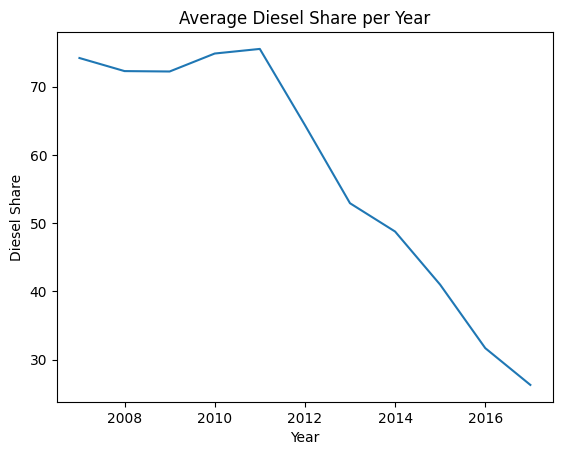

Year
2007    74.216667
2008    72.300000
2009    72.241667
2010    74.875000
2011    75.550000
Name: Diesel_Share, dtype: float64

In [60]:
# g) Draw a line chart of average diesel share per year

# Group by year
diesel_yearly = df.groupby("Year")["Diesel_Share"].mean()

# Plot
plt.figure()
diesel_yearly.plot()
plt.title("Average Diesel Share per Year")
plt.xlabel("Year")
plt.ylabel("Diesel Share")
plt.show()

diesel_yearly.head()

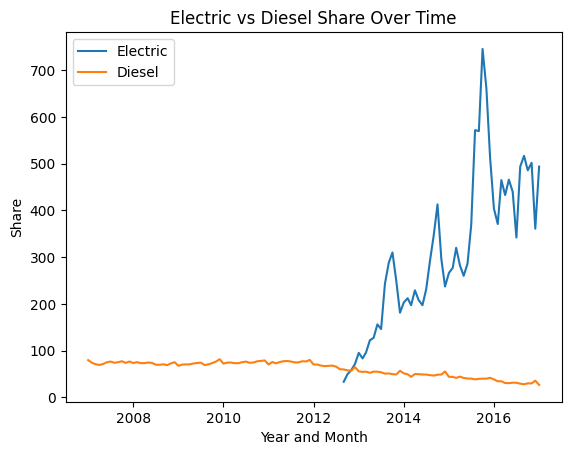

In [63]:
# h) Discuss some findings with a friend based on this dataset, and do plot more graphs

# Example extra plot: electric vs diesel share

plt.figure()
plt.plot(df["Date"], df["Import_Electric"], label="Electric")
plt.plot(df["Date"], df["Diesel_Share"], label="Diesel")
plt.legend()
plt.title("Electric vs Diesel Share Over Time")
plt.xlabel("Year and Month")
plt.ylabel("Share")
plt.show()
